(binary_hgf)=
# The binary Hierarchical Gaussian Filter

In [1]:
import jax.numpy as jnp
from ghgf.model import HGF
from ghgf import load_data
import seaborn as sns

sns.set_context("talk")

In this notebook, we demonstrate how to use the standard 2-levels and 3-level Hierarchical Gaussian Filters (HGF) for binary inputs. This class of models is identical to the continuous counterpart, with the difference that the input node accepts binary data. Such binary responses are widely used in decision-making studies. Here, we will observe how binary HGFs can track switches in responses probability across the task.

## Imports
We import a time series of binary responses from the decision task described in {cite:p}`2013:iglesias`.

In [2]:
timeserie = load_data("binary")

# Format the data input accordingly (a value column and a time column)
data = jnp.array([timeserie, jnp.arange(1, len(timeserie) + 1, dtype=float)]).T

## Using a two-levels Hierarchical Gaussian Filter
### Create the model

The node structure corresponding to the 2-levels and 3-levels Hierarchical Gaussian Filters are automatically generated from `model_type` and `n_levels` using the nodes parameters provided in the dictionaries. Here we are not performing any optimization so thoses parameters are fixed to reasonnable values.

In [3]:
two_levels_hgf = HGF(
    n_levels=2,
    model_type="binary",
    initial_mu={"1": .0, "2": .5},
    initial_pi={"1": .0, "2": 1e4},
    omega={"1": None, "2": -6.0},
    rho={"1": None, "2": 0.0},
    kappas={"1": None},
    eta0=0.0,
    eta1=1.0,
    pihat = jnp.inf,
)

Creating a binary Hierarchical Gaussian Filter with 2 levels (JAX backend).


### Add data

In [4]:
# Provide new observations
two_levels_hgf = two_levels_hgf.input_data(data)

Add 320 new binary observations.


### Plot trajectories

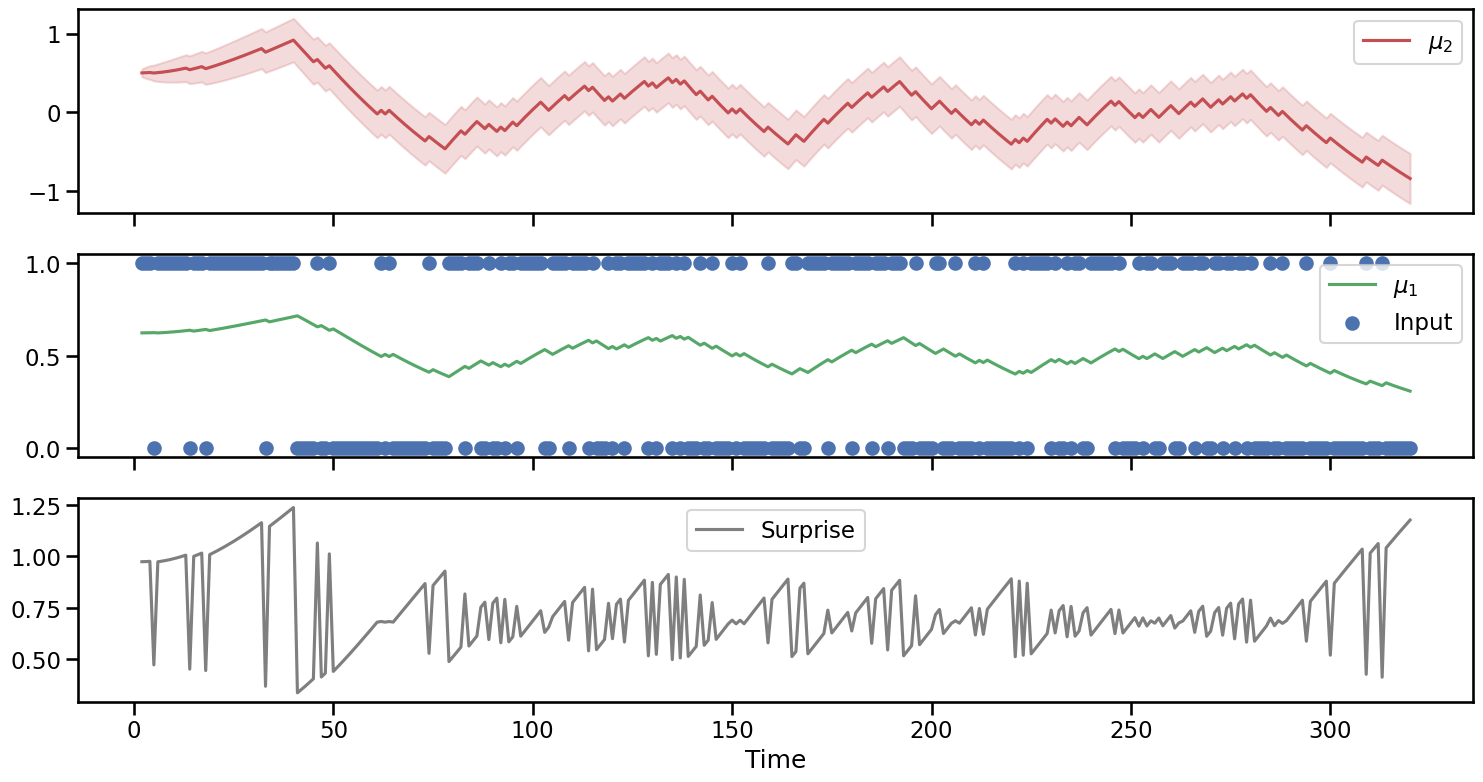

In [5]:
two_levels_hgf.plot_trajectories()

We can see that the surprise will increase when the time series exhibit more unexpected behaviors. The degree to which a given observation is expected will deppends on the expeted value and volatility in the input node, that are influenced by the values of higher order nodes. One way to assess model fit is to look at the total gaussian surprise for each observation. This values can be returned using the `surprise` method:

In [6]:
two_levels_hgf.surprise()

DeviceArray(237.2308, dtype=float32)

## Using a three-level Hierarchical Gaussian Filter
### Create the model

In [6]:
three_levels_hgf = HGF(
    n_levels=3,
    model_type="binary",
    initial_mu={"1": .0, "2": .5, "3": 0.},
    initial_pi={"1": .0, "2": 1e4, "3": 1e1},
    omega={"1": None, "2": -6.0, "3": -2.0},
    rho={"1": None, "2": 0.0, "3": 0.0},
    kappas={"1": None, "2": 1.0},
    eta0=0.0,
    eta1=1.0,
    pihat = jnp.inf,
)

Creating a binary Hierarchical Gaussian Filter with 3 levels (JAX backend).


### Add data

In [7]:
three_levels_hgf = three_levels_hgf.input_data(data)

Add 320 new binary observations.


### Plot trajectories

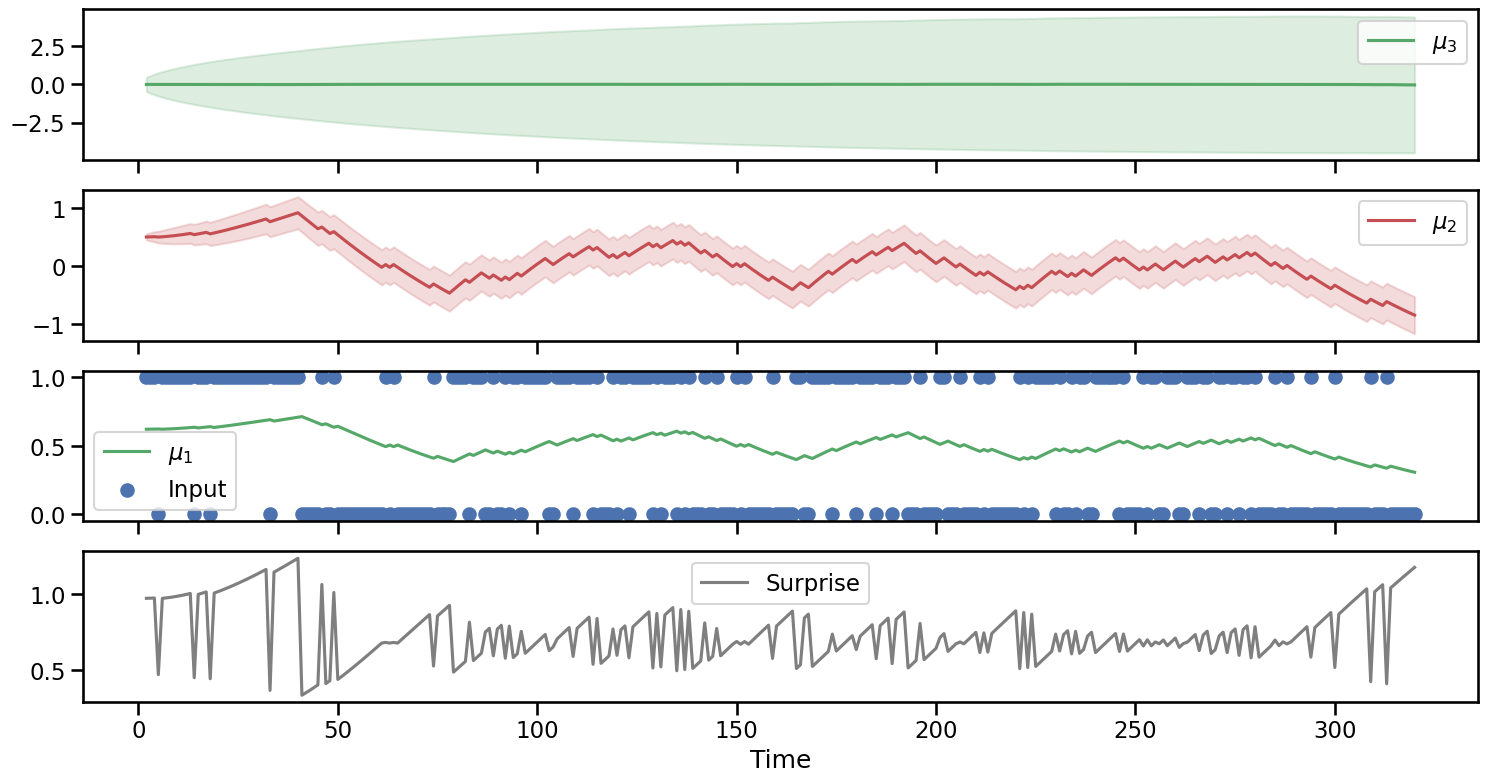

In [8]:
three_levels_hgf.plot_trajectories()

# System configuration

In [9]:
%load_ext watermark
%watermark -n -u -v -iv -w -p ghgf,jax,jaxlib

Last updated: Tue Jan 17 2023

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.4.0

ghgf  : 0.0.1.dev0
jax   : 0.3.5
jaxlib: 0.3.22

seaborn: 0.12.1
jax    : 0.3.5

Watermark: 2.3.1

